In [1]:
%matplotlib inline

In [2]:
from thetis import *

In [3]:
import matplotlib.pyplot as plt
import numpy as np

In [4]:
from adapt_utils.case_studies.tohoku.options.okada_options import TohokuOkadaBasisOptions
from adapt_utils.case_studies.tohoku.options.radial_options import TohokuRadialBasisOptions
from adapt_utils.unsteady.solver import AdaptiveProblem
from adapt_utils.unsteady.swe.tsunami.conversion import lonlat_to_utm

In [6]:
level = 0
kwargs = {
    'level': level,
    'okada_grid_lon_min': 140,
    'okada_grid_lon_max': 145,
    'okada_grid_lat_min': 35,
    'okada_grid_lat_max': 41,
    'debug': True,
    'debug_mode': 'light',
}
op = TohokuOkadaBasisOptions(**kwargs)
op.active_controls = ('slip', 'rake')

INIT: Loading mesh...
INIT: Checking validity of gauge coordinates...
INIT: overall QoI normalisation factor: 1.0000e+00


## Define the target image

In [7]:
op_src = TohokuRadialBasisOptions(mesh=op.default_mesh, nx=1, ny=1, control_parameters=[6], level=level)
swp_src = AdaptiveProblem(op_src)
swp_src.set_initial_condition()
f_src = swp_src.fwd_solutions[0].split()[1]
del swp_src
del op_src

In [8]:
swp = AdaptiveProblem(op)

********************************************************************************
AdaptiveProblem initialisation begin
********************************************************************************

SETUP: Setting default meshes...
SETUP: Mesh 0 has 15849 elements and 8322 vertices
SETUP: Creating finite elements...
SETUP: Creating function spaces...
SETUP: Creating solutions...
SETUP: Creating fields...
INIT: Reading bathymetry file...
INIT: Creating bathymetry interpolator...
INIT: Interpolating bathymetry...
INIT: Capping bathymetry...
INIT: Computing CFL number on mesh 0...
INIT:   dx = 3.1817e+03  dt = 6.0000e+01  CFL number = 5.8199e+00 > 1
SETUP: Setting stabilisation parameters...
SETUP: Setting boundary conditions...
SETUP: Creating output files...


## Project

INIT: Assembling Okada basis function array...
PROJECTION: Loading slip mass matrix from cache...
PROJECTION: Assembling RHS for slip solve...
PROJECTION: Solving linear system for slip...
INIT: Subtracting initial surface from bathymetry field...
INIT: Interpolating bathymetry...
INIT: Capping bathymetry...


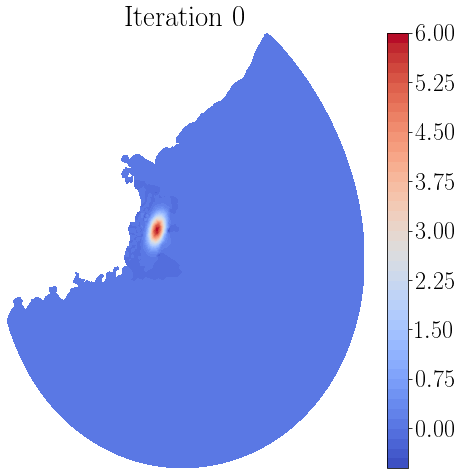

PROJECTION: Relative l2 error at iteration 0 = 6.12%
INIT: Assembling Okada basis function array...
PROJECTION: Assembling rake mass matrix...
PROJECTION: Assembling RHS for rake solve...
PROJECTION: Solving linear system for rake...
INIT: Assembling Okada basis function array...
PROJECTION: Assembling slip mass matrix...
PROJECTION: Assembling RHS for slip solve...
PROJECTION: Solving linear system for slip...
INIT: Subtracting initial surface from bathymetry field...
INIT: Interpolating bathymetry...
INIT: Capping bathymetry...


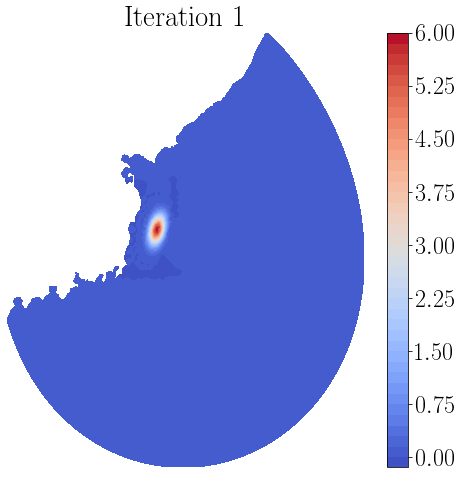

PROJECTION: Relative l2 error at iteration 1 = 2.72%
PROJECTION: Terminated after maximum iteration count, 2!
PROJECTION: relative errors: [0.061190333650107155, 0.027247562764487157]


In [9]:
surf = op.project(swp, f_src)

In [10]:
lonlat_corners = [(138, 32), (148, 42), (138, 42)]
utm_corners = [lonlat_to_utm(*corner, 54) for corner in lonlat_corners]
xlim = [utm_corners[0][0], utm_corners[1][0]]
ylim = [utm_corners[0][1], utm_corners[2][1]]

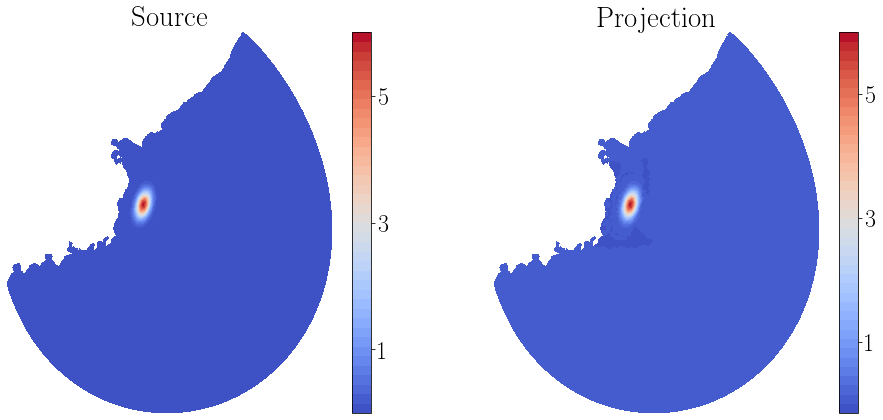

In [11]:
fig, axes = plt.subplots(ncols=2, figsize=(16, 7))
for ax, f in zip(axes, (f_src, surf)):
#     cbar = fig.colorbar(tricontourf(f, cmap='coolwarm', levels=np.linspace(-1.5, 7.5, 50), axes=ax), ax=ax)
    cbar = fig.colorbar(tricontourf(f, cmap='coolwarm', levels=50, axes=ax), ax=ax)
    cbar.set_ticks(np.linspace(-1, 7, 5))
    ax.axis(False);
axes[0].set_title("Source");
axes[1].set_title("Projection");